In [1]:
import cv2
import homcloud.interface as hc
import numpy as np
import matplotlib.pyplot as plt
import copy
import napari
from napari.utils import nbscreenshot

### Cell image from Image analysis with Python and Napari

In [2]:
image = cv2.imreadmulti("membrane.tif", flags =cv2.IMREAD_UNCHANGED)
imageSlices=image[1]

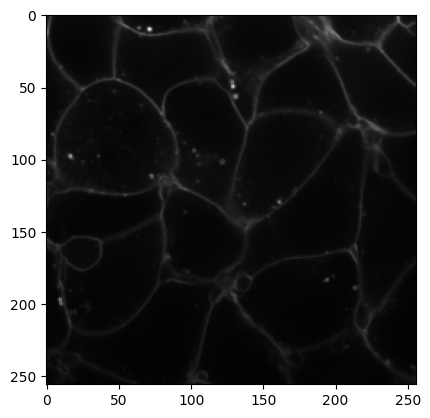

In [3]:
pict=imageSlices[30]
plt.imshow(pict,cmap='gray')
plt.show()

In [4]:
%%time
hc.BitmapPHTrees.for_bitmap_levelset(pict, "sublevel", save_to="grayscale-tree.pdgm")
phtrees = hc.PDList("grayscale-tree.pdgm").bitmap_phtrees(0)

CPU times: total: 1.44 s
Wall time: 1.48 s


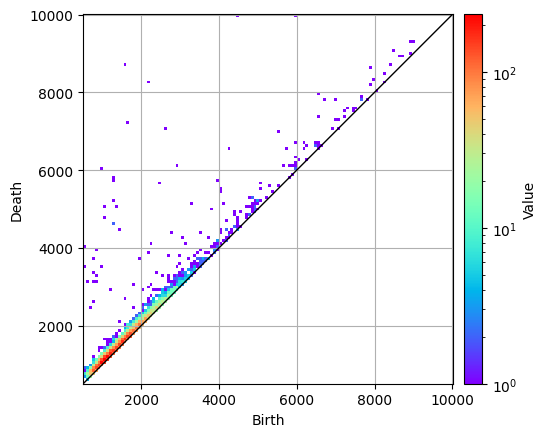

In [5]:
pdlist_with_tree = hc.PDList("grayscale-tree.pdgm")
pd0=pdlist_with_tree[0]
pd0.histogram().plot(colorbar={"type": "log"})

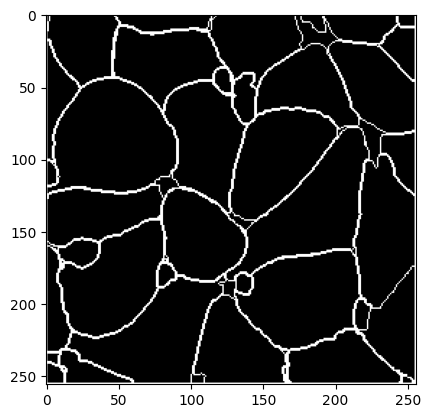

CPU times: total: 125 ms
Wall time: 151 ms


In [6]:
%%time
lifethres=1000#####Threshold value for the persistence
volumethres=50#####Threshold value for the volume size to be detected
nodes = [node for node in phtrees.nodes if node.lifetime() > lifethres and node.death_time() != np.inf and len(node.volume())>volumethres]
lifetimes=[nodes[i].death_time()-nodes[i].birth_time() for i in range (0,len(nodes))]
sorted_ascending=np.argsort(np.array(lifetimes))
non_overlapping_segmentation=[[] for i in range (0,len(nodes))]
h,w=pict.shape
segmentedpixels=np.zeros((h,w))
enhanced_contours=[]
for i in range (0,len(nodes)):
    detected_mask=np.zeros((h,w))
    mask_spots=tuple(np.transpose(np.array(nodes[sorted_ascending[i]].volume())).tolist())
    detected_mask[mask_spots]=255
    kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])
    dilated_mask=cv2.dilate(detected_mask,kernel=kernel,iterations=2)
    non_overlapping_mask=copy.deepcopy(dilated_mask)
    non_overlapping_mask[np.where(segmentedpixels)]=0
    segmentedpixels[np.where(non_overlapping_mask)]=255
    non_overlapping_mask=non_overlapping_mask.astype('uint8')
    contours, hierarchy = cv2.findContours(non_overlapping_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for u in range (0,len(contours)):
        enhanced_contours.extend([contours[u][t][0].tolist() for t in range (0,len(contours[u]))])
slice_contour_img=np.zeros((h,w))
contour_spots=(np.transpose(np.array(enhanced_contours)).tolist()[1],np.transpose(np.array(enhanced_contours)).tolist()[0])
slice_contour_img[contour_spots]=255
#####draw white lines if necessary (for the detection of connected components in the next step)
slice_contour_img[0,:]=255
slice_contour_img[:,0]=255
slice_contour_img[h-1,:]=255
slice_contour_img[:,w-1]=255
#####
slice_contour_img=slice_contour_img.astype('uint8')
plt.imshow(slice_contour_img, cmap='gray')
plt.show()

In [7]:
viewer=napari.view_image(pict)
viewer.add_labels(cv2.dilate(slice_contour_img,kernel=kernel,iterations=1))

Assistant skips harvesting pyclesperanto as it's not installed.


<Labels layer 'Labels' at 0x22f92519510>

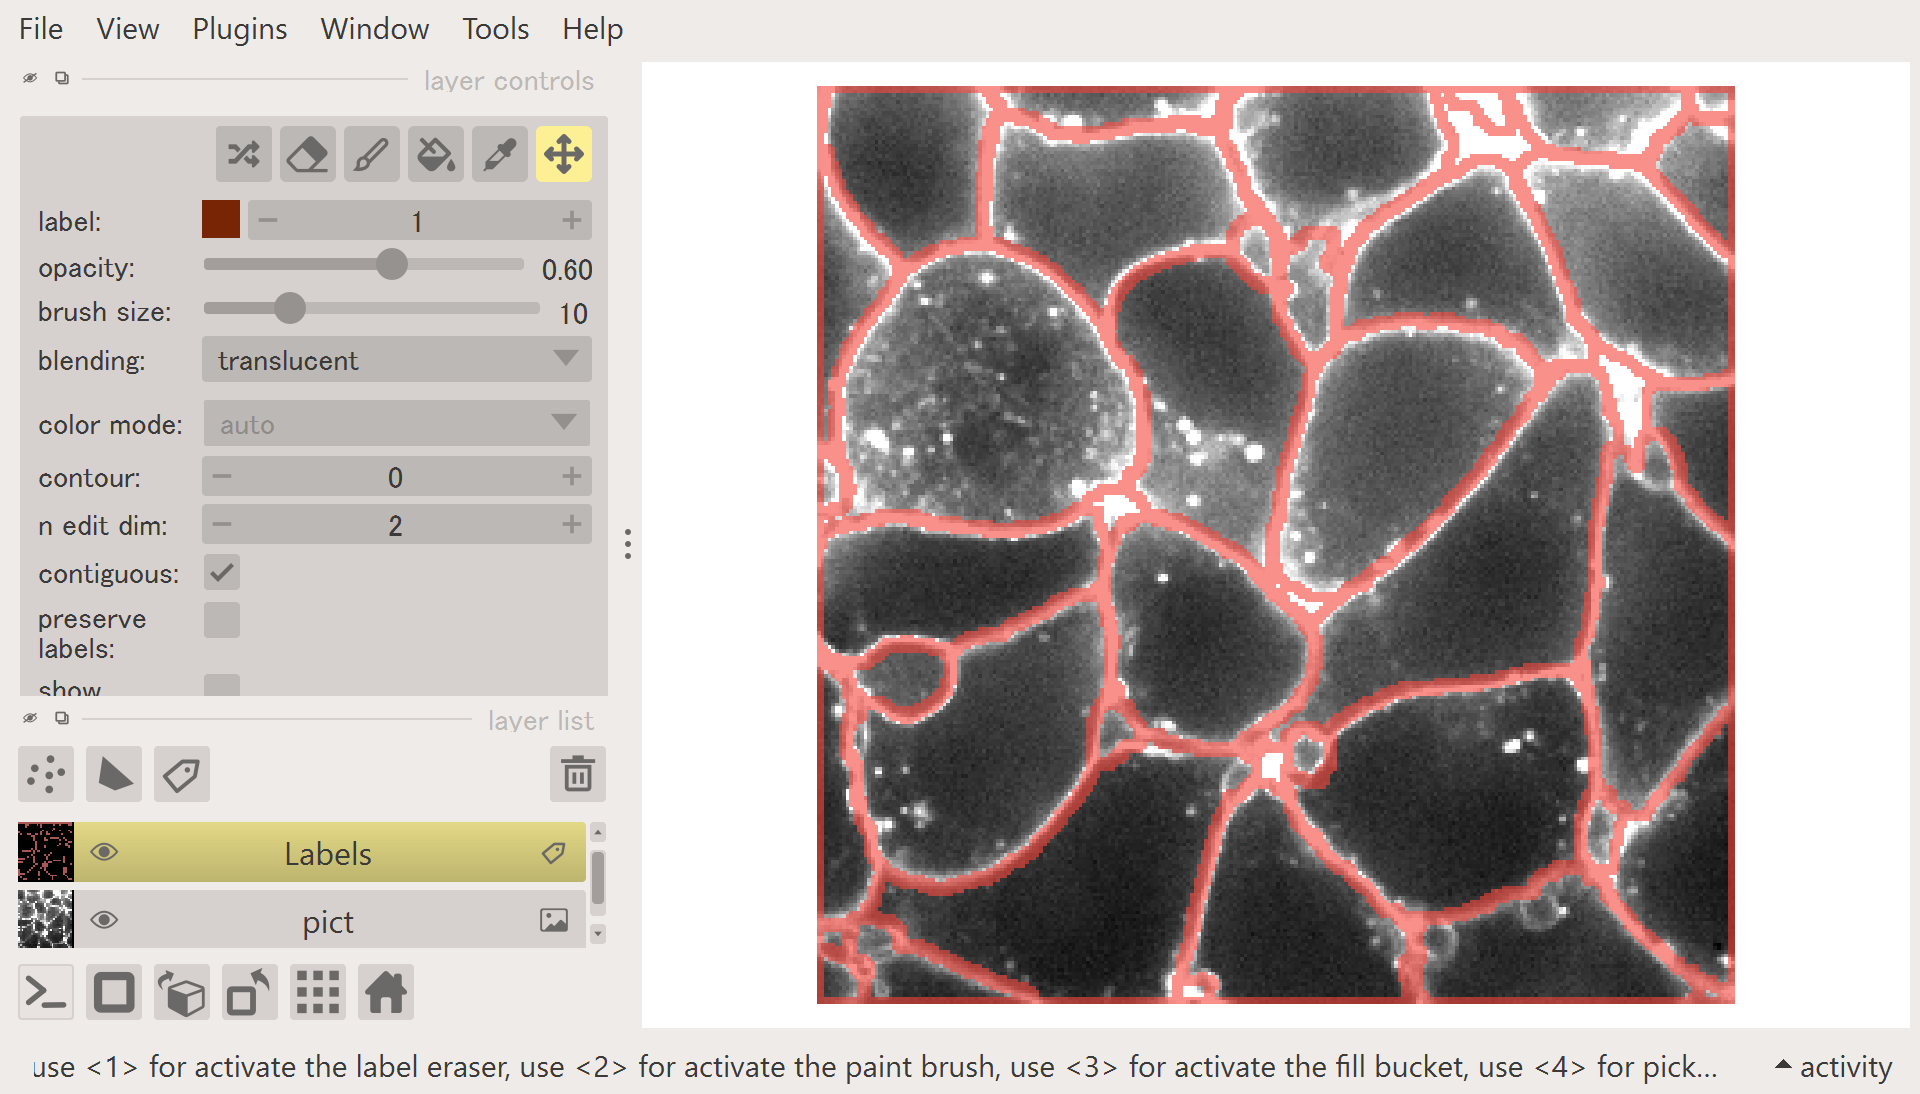

In [9]:
nbscreenshot(viewer)

### A plant cell image

In [8]:
import h5py
import pandas as pd
import numpy as np
from skimage import filters

In [9]:
f = h5py.File('Movie1_t00003_crop_gt.h5')
img=f['raw'][:,:,494]
f.close()

In [10]:
filtered_img=filters.sato(img,sigmas=range(3,7,1),black_ridges=False,mode='reflect',cval=0)
filtered_img_rescaled=(filtered_img*255/np.max(filtered_img)).astype('uint8')

In [11]:
%%time
pict=filtered_img_rescaled
pict_16=copy.deepcopy(pict)
pict_16=pict_16.astype('uint16')
pict_16=pict_16+1
pict_16[1,1]=0
hc.BitmapPHTrees.for_bitmap_levelset(pict_16, "sublevel", save_to="grayscale-tree.pdgm")
phtrees = hc.PDList("grayscale-tree.pdgm").bitmap_phtrees(0)

CPU times: total: 2.98 s
Wall time: 2.97 s


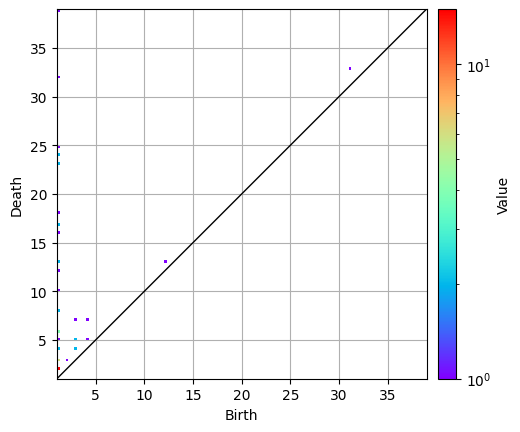

In [12]:
pdlist_with_tree = hc.PDList("grayscale-tree.pdgm")
pd0=pdlist_with_tree[0]
pd0.histogram().plot(colorbar={"type": "log"})

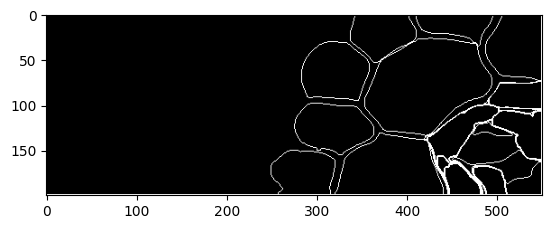

CPU times: total: 172 ms
Wall time: 161 ms


In [13]:
%%time
lifethres=3#####Threshold value for the persistence
volumethres=500#####Threshold value for the volume size to be detected
nodes = [node for node in phtrees.nodes if node.lifetime() > lifethres and node.death_time() != np.inf and len(node.volume())>volumethres]
lifetimes=[nodes[i].death_time()-nodes[i].birth_time() for i in range (0,len(nodes))]
sorted_ascending=np.argsort(np.array(lifetimes))
non_overlapping_segmentation=[[] for i in range (0,len(nodes))]
h,w=pict.shape
segmentedpixels=np.zeros((h,w))
enhanced_contours=[]
for i in range (0,len(nodes)):
    detected_mask=np.zeros((h,w))
    mask_spots=tuple(np.transpose(np.array(nodes[sorted_ascending[i]].volume())).tolist())
    detected_mask[mask_spots]=255
    kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])
    dilated_mask=cv2.dilate(detected_mask,kernel=kernel,iterations=2)
    non_overlapping_mask=copy.deepcopy(dilated_mask)
    non_overlapping_mask[np.where(segmentedpixels)]=0
    segmentedpixels[np.where(non_overlapping_mask)]=255
    non_overlapping_mask=non_overlapping_mask.astype('uint8')
    contours, hierarchy = cv2.findContours(non_overlapping_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for u in range (0,len(contours)):
        enhanced_contours.extend([contours[u][t][0].tolist() for t in range (0,len(contours[u]))])
slice_contour_img=np.zeros((h,w))
contour_spots=(np.transpose(np.array(enhanced_contours)).tolist()[1],np.transpose(np.array(enhanced_contours)).tolist()[0])
slice_contour_img[contour_spots]=255
#####draw white lines if necessary (for the detection of connected components in the next step)
slice_contour_img[0,:]=255
slice_contour_img[:,0]=255
slice_contour_img[h-1,:]=255
slice_contour_img[:,w-1]=255
#####
slice_contour_img=slice_contour_img.astype('uint8')
plt.imshow(slice_contour_img, cmap='gray')
plt.show()

In [19]:
viewer=napari.view_image(img)
viewer.add_labels(cv2.dilate(slice_contour_img,kernel=kernel,iterations=1))

<Labels layer 'Labels' at 0x2b88f5653f0>

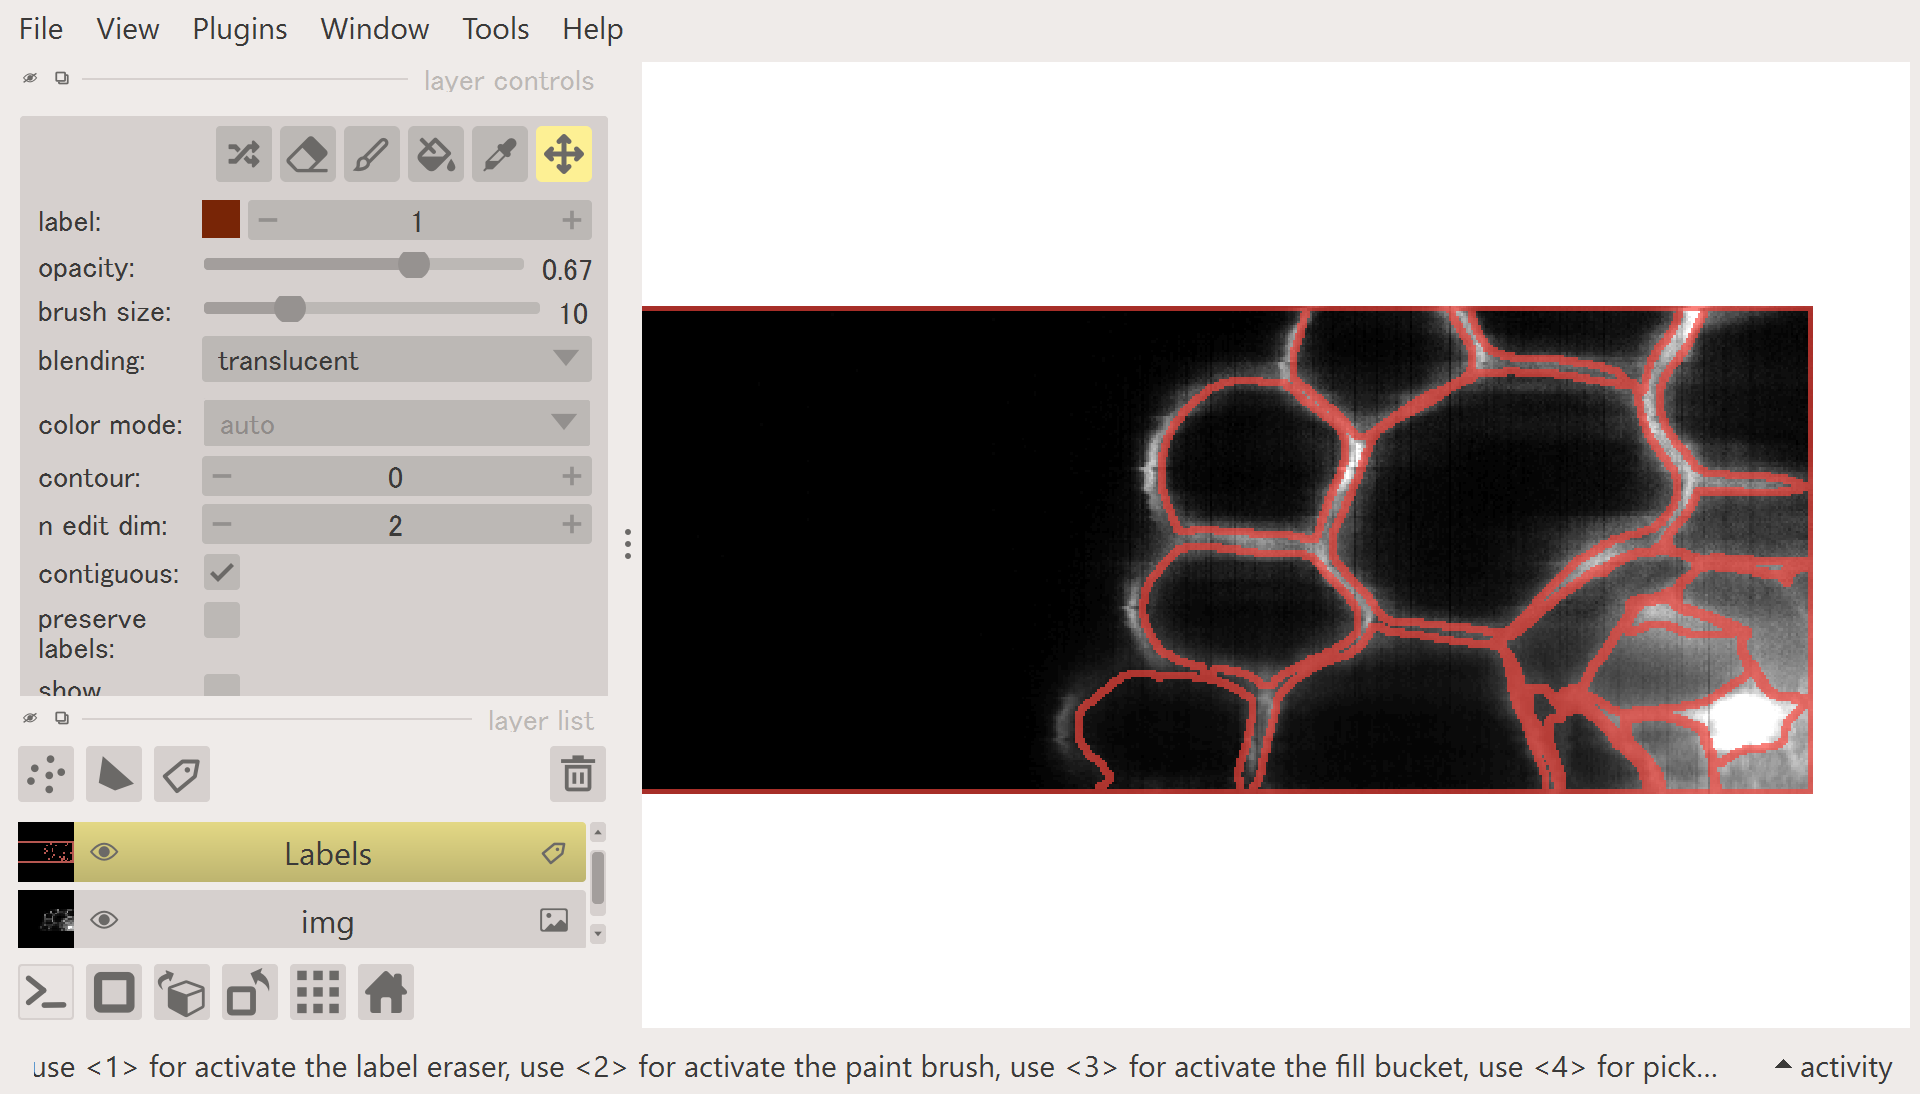

In [20]:
nbscreenshot(viewer)

### Epithelial cell image

In [17]:
import tqdm

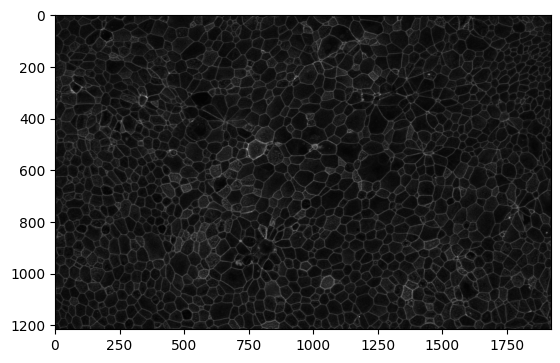

In [14]:
image = cv2.imread("U13_72_C2_4_ACB.tif", cv2.IMREAD_UNCHANGED)
plt.imshow(image,cmap='gray')
plt.show()

In [15]:
filtered_img=filters.sato(image,sigmas=range(3,5,1),black_ridges=False,mode='reflect',cval=0)

In [16]:
%%time
hc.BitmapPHTrees.for_bitmap_levelset(filtered_img, "sublevel", save_to="grayscale-tree2.pdgm")
phtrees = hc.PDList("grayscale-tree2.pdgm").bitmap_phtrees(0)

CPU times: total: 59.4 s
Wall time: 1min 1s


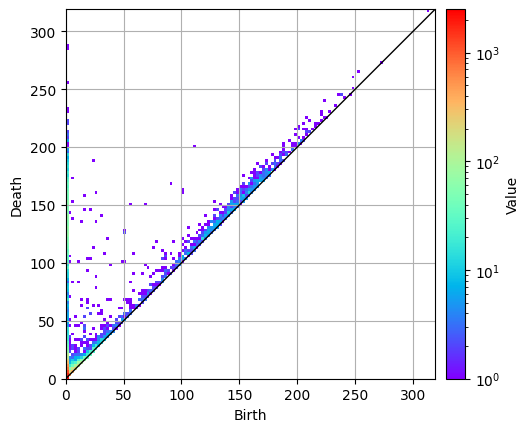

In [18]:
pdlist_with_tree = hc.PDList("grayscale-tree2.pdgm")
pd0=pdlist_with_tree[0]
pd0.histogram().plot(colorbar={"type": "log"})

1721


100%|██████████████████████████████████████████████████████████████████████████████| 1721/1721 [01:42<00:00, 16.76it/s]


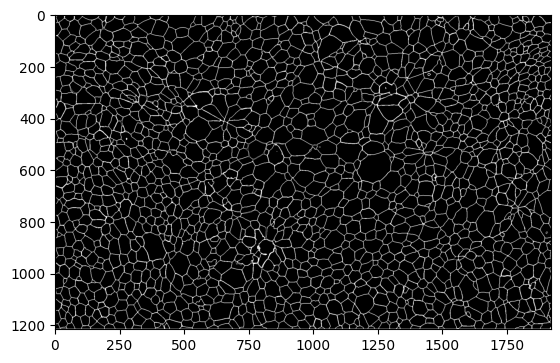

CPU times: total: 1min 57s
Wall time: 1min 43s


In [19]:
%%time
pict=image
lifethres=50#####Threshold value for the persistence
volumethres=100#####Threshold value for the volume size to be detected
nodes = [node for node in phtrees.nodes if node.lifetime() > lifethres and node.death_time() != np.inf and len(node.volume())>volumethres]
lifetimes=[nodes[i].death_time()-nodes[i].birth_time() for i in range (0,len(nodes))]
sorted_ascending=np.argsort(np.array(lifetimes))
non_overlapping_segmentation=[[] for i in range (0,len(nodes))]
h,w=pict.shape
segmentedpixels=np.zeros((h,w))
enhanced_contours=[]
print(len(nodes))
for i in tqdm.tqdm(range (0,len(nodes))):
    detected_mask=np.zeros((h,w))
    mask_spots=tuple(np.transpose(np.array(nodes[sorted_ascending[i]].volume())).tolist())
    detected_mask[mask_spots]=255
    kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])
    dilated_mask=cv2.dilate(detected_mask,kernel=kernel,iterations=2)
    non_overlapping_mask=copy.deepcopy(dilated_mask)
    non_overlapping_mask[np.where(segmentedpixels)]=0
    segmentedpixels[np.where(non_overlapping_mask)]=255
    non_overlapping_mask=non_overlapping_mask.astype('uint8')
    contours, hierarchy = cv2.findContours(non_overlapping_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for u in range (0,len(contours)):
        enhanced_contours.extend([contours[u][t][0].tolist() for t in range (0,len(contours[u]))])
slice_contour_img=np.zeros((h,w))
contour_spots=(np.transpose(np.array(enhanced_contours)).tolist()[1],np.transpose(np.array(enhanced_contours)).tolist()[0])
slice_contour_img[contour_spots]=255
#####draw white lines if necessary (for the detection of connected components in the next step)
slice_contour_img[0,:]=255
slice_contour_img[:,0]=255
slice_contour_img[h-1,:]=255
slice_contour_img[:,w-1]=255
#####
slice_contour_img=slice_contour_img.astype('uint8')
plt.imshow(slice_contour_img, cmap='gray')
plt.show()

In [20]:
viewer4=napari.view_image(image)
viewer4.add_labels(slice_contour_img)

<Labels layer 'slice_contour_img' at 0x22f9cfcbfd0>

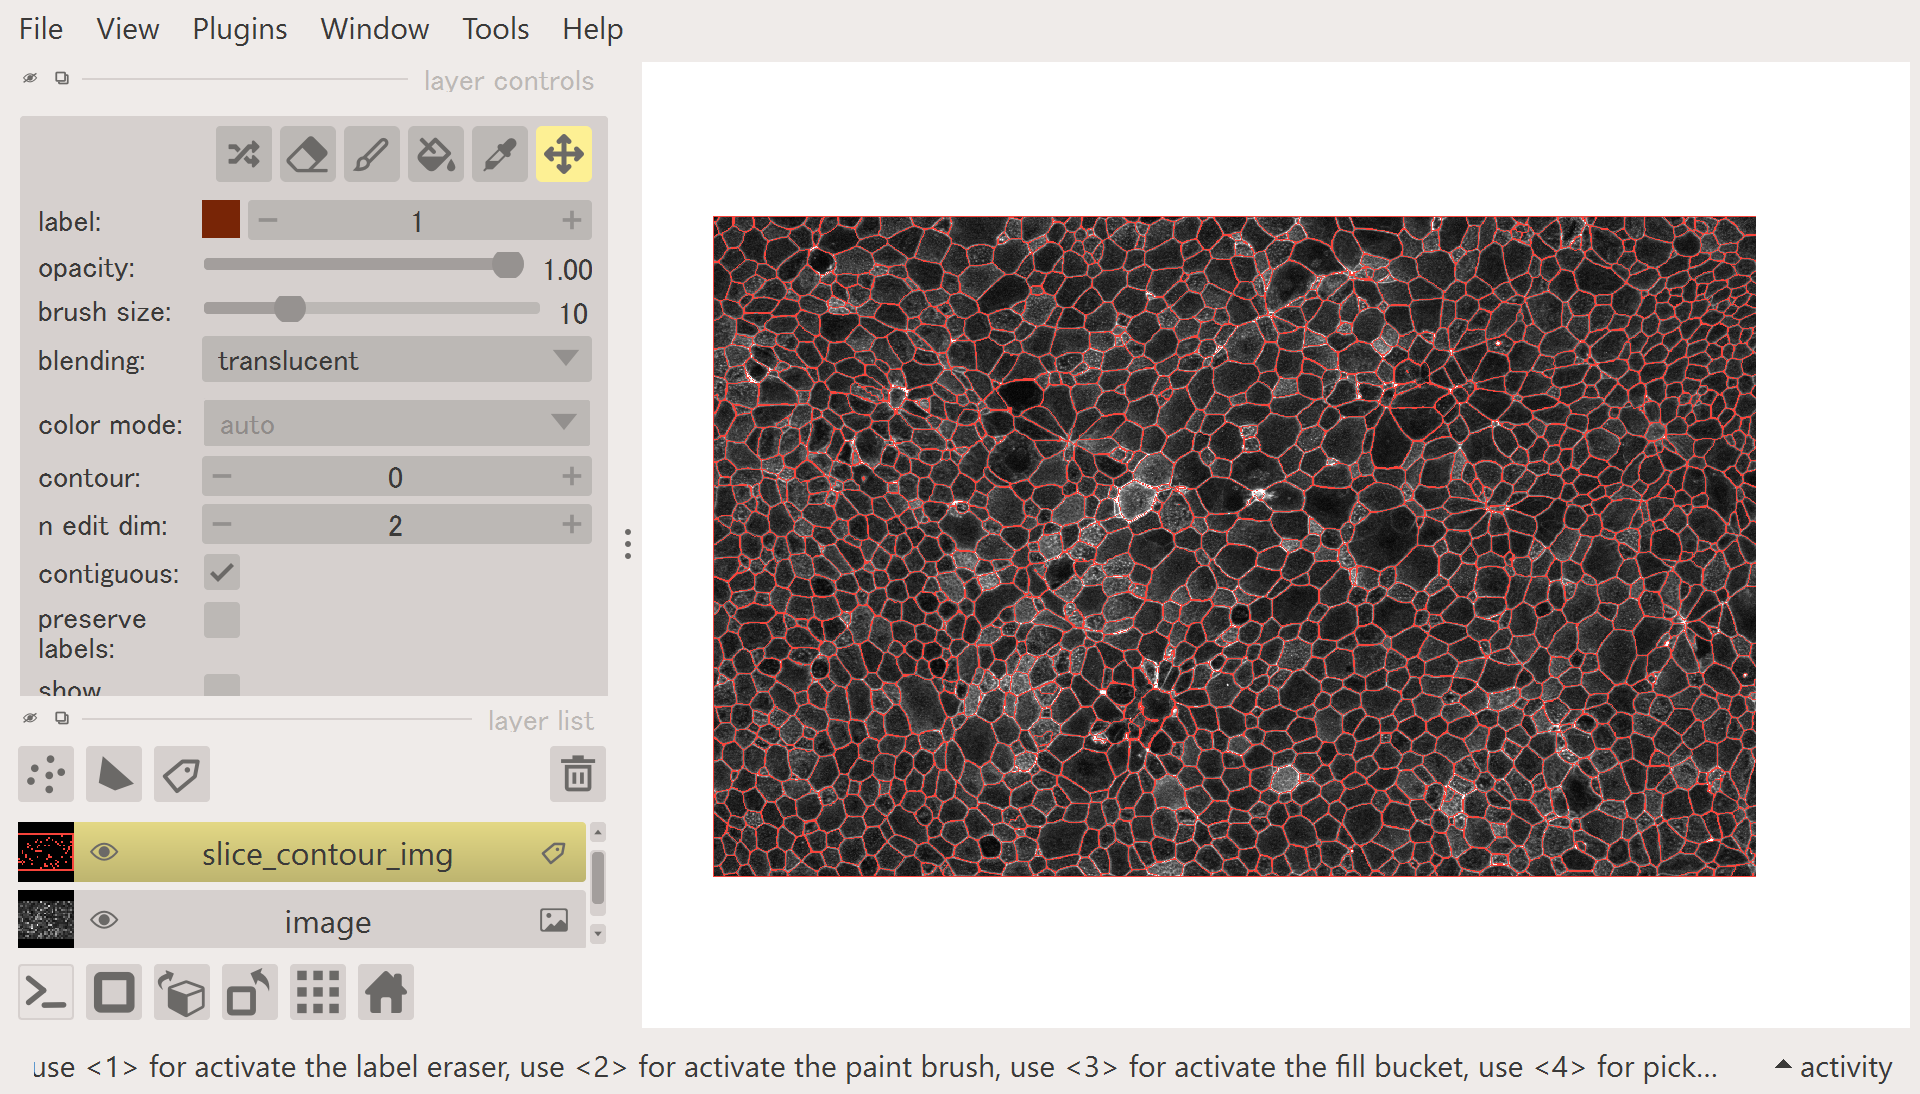

In [21]:
nbscreenshot(viewer4)